[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.
    0.           0.           0.           0.           

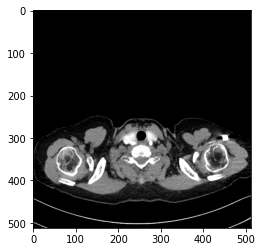

In [52]:
# true function
import pydicom
import numpy as np
import matplotlib.pyplot as plt

# WND function
# file = pydicom.dcmread('/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test/case0027/CT2/00000007.DCM')
file = pydicom.dcmread('/Users/ryotaroakagawa/pix2pix3D-CT/result/dataset01_test/case0027/dicom/00000007.DCM')
w_0 = 350
w_1 = 50
X = file.pixel_array * file.RescaleSlope + file.RescaleIntercept
# print(X.astype(int))
#ウィンドウ処理
R = 255*(X-(w_1)+0.5*(w_0))/w_0
R[R<0] = 0
R[R>255] = 255

print(R)
plt.imshow(R,cmap='gray')
plt.show()



In [45]:

# # widow function apply
# import os
# import pydicom
# import numpy as np
# from sklearn.metrics import mean_absolute_error
# import matplotlib.pyplot as plt

# def WND(X, W):
#     R = 255.*(X-W[1]+0.5*W[0])/W[0]
#     R[R<0] = 0
#     R[R>255] = 255
#     return R

# gt_file = pydicom.dcmread('/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test/case0027/CT2/00000100.DCM')
# gene_file = pydicom.dcmread('/Users/ryotaroakagawa/pix2pix3D-CT/result/dataset01_test/case0027/dicom/00000100.DCM')

# gt_array = gt_file.pixel_array * gt_file.RescaleSlope + gt_file.RescaleIntercept
# gene_array = gene_file.pixel_array * gene_file.RescaleSlope + gene_file.RescaleIntercept

# gt = WND(gt_array,[350,50])
# gene = WND(gene_array,[350,50])

# plt.imshow(gt,cmap='gray')
# plt.show()
# plt.imshow(gene,cmap='gray')
# plt.show()

# mae = mean_absolute_error(gt_array.flatten(), gene_array.flatten())

# print(mae)

# non
import os
import pydicom
import numpy as np
from sklearn.metrics import mean_absolute_error

# gt_file = pydicom.dcmread('/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test/case0027/CT2/00000100.DCM')
gt_file = pydicom.dcmread('/Users/ryotaroakagawa/pix2pix3D-CT/result/dataset01_test/case0027/dicom/00000100.DCM')
gene_file = pydicom.dcmread('/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test/case0027/CT1/00000100.DCM')

gt_array = gt_file.pixel_array * gt_file.RescaleSlope + gt_file.RescaleIntercept
gene_array = gene_file.pixel_array * gene_file.RescaleSlope + gene_file.RescaleIntercept

mae = mean_absolute_error(gt_array.flatten(), gene_array.flatten())

print(mae)


24.16260528564453


In [50]:
import os
import pydicom
import numpy as np
from sklearn.metrics import mean_absolute_error

gt_folder = '/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test'
gene_folder = '/Users/ryotaroakagawa/pix2pix3D-CT/result/dataset01_test'
# gene_folder = '/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test'

total_mae = 0
total_folders = 0

case_folders = [folder for folder in sorted(os.listdir(gt_folder)) if 'case' in folder]

for case_folder in case_folders:
    gt_folder_path = os.path.join(gt_folder, case_folder, 'CT2')
    # gene_folder_path = os.path.join(gene_folder, case_folder, 'CT1')
    gene_folder_path = os.path.join(gene_folder, case_folder, 'dicom')
    
    gt_files = sorted(os.listdir(gt_folder_path))
    gene_files = sorted(os.listdir(gene_folder_path))

    case_mae = 0

    for file_path in gt_files:
        gt_file_path = os.path.join(gt_folder_path, file_path)
        gene_file_path = os.path.join(gene_folder_path, file_path)

        gt_dicom = pydicom.dcmread(gt_file_path)
        gene_dicom = pydicom.dcmread(gene_file_path)

        # gt_array = gt_dicom.pixel_array * gt_dicom.RescaleSlope + gt_dicom.RescaleIntercept
        # gene_array = gene_dicom.pixel_array * gene_dicom.RescaleSlope + gene_dicom.RescaleIntercept
        gt_array = gt_dicom.pixel_array.astype(float)
        gene_array = gene_dicom.pixel_array.astype(float)

        mae = mean_absolute_error(gt_array.flatten(), gene_array.flatten())
        
        case_mae += mae

    avg_case_mae = case_mae / len(gt_files)
    total_mae += avg_case_mae
    total_folders += 1  # 修正: total_filesを更新
    print(len(gt_files))
    print('caseMAE', {avg_case_mae})

print('Total MAE:', total_mae / total_folders)  # 修正: total_filesで割るよう修正


371
caseMAE {21.6427789569865}
301
caseMAE {12.69204429296956}
346
caseMAE {23.33156895499698}
401
caseMAE {23.59974980532677}
Total MAE: 20.316535502569952


In [3]:
import pydicom
import numpy as np

def read_dicom_and_get_ct_values(file_path):
    # DICOMファイルを読み込む
    dicom_data = pydicom.dcmread(file_path)

    # CT値を取得し、マイナスも含めて配列に格納する
    ct_array = dicom_data.pixel_array * dicom_data.RescaleSlope + dicom_data.RescaleIntercept
    print(np.min(ct_array))
    print(np.max(ct_array))
    print(np.size(ct_array))
    count_greater_than_1023 = np.sum(ct_array > 1023)
    print(count_greater_than_1023)
    # count_of_1023 = np.count_nonzero(ct_array == 1023)
    # print('count1203',count_of_1023)
    return ct_array

# DICOMファイルのパスを指定
dicom_file_path1 = "/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test/case0027/CT1/00000005.DCM"
dicom_file_path2 = "/Users/ryotaroakagawa/pix2pix3D-CT/dicom/dataset01_test/case0027/CT2/00000005.DCM"

# CT値を取得
ct_values1 = read_dicom_and_get_ct_values(dicom_file_path1)
ct_values2 = read_dicom_and_get_ct_values(dicom_file_path2)

# 結果を表示
print("CT val1:",ct_values1)
print("CTval2:",ct_values2)

-1024.0
2625.0
262144
85
-1024.0
4322.0
262144
915
CT val1: [[-1008. -1003. -1004. ... -1024. -1024. -1024.]
 [-1005. -1009. -1006. ... -1024. -1024. -1024.]
 [ -997. -1006. -1009. ... -1024. -1024. -1024.]
 ...
 [-1017. -1008.  -996. ... -1024. -1024. -1024.]
 [-1005.  -992.  -996. ... -1024. -1024. -1024.]
 [-1001. -1009. -1015. ... -1024. -1024. -1024.]]
CTval2: [[-1008. -1003. -1004. ... -1024. -1024. -1024.]
 [-1005. -1009. -1006. ... -1024. -1024. -1024.]
 [ -997. -1006. -1009. ... -1024. -1024. -1024.]
 ...
 [-1017. -1008.  -996. ... -1024. -1024. -1024.]
 [-1005.  -992.  -996. ... -1024. -1024. -1024.]
 [-1001. -1009. -1015. ... -1024. -1024. -1024.]]
